In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf = pd.read_csv("../fooddeliver/train.csv")
testdf= pd.read_csv("../fooddeliver/test.csv")
sample_sub= pd.read_csv("../fooddeliver/Sample_Submission.csv")

In [4]:
traindf.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
traindf.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [5]:
testdf.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [7]:
testdf.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64

In [13]:
traindf=traindf.replace('NaN', float(np.nan), regex=True)

<AxesSubplot:>

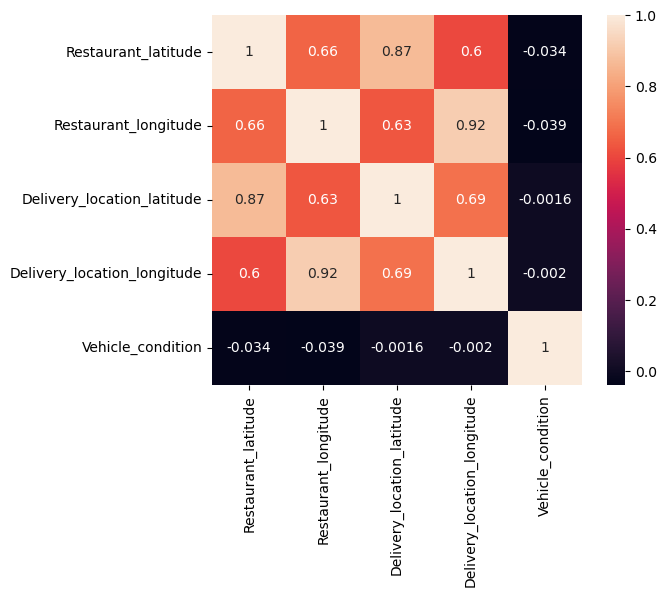

In [14]:
sns.heatmap(traindf.corr(),annot=True, square=True)

DISTANCE MEASURE

In [29]:
import math

In [30]:
def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat / 2) * math.sin(dLat / 2) + \
        math.sin(dLon / 2) * math.sin(dLon / 2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [31]:
traindf["distance"] = traindf.apply(lambda row: distance(row["Restaurant_latitude"], row["Restaurant_longitude"], row["Delivery_location_latitude"], row["Delivery_location_longitude"]), axis=1)


In [32]:
new_weather = traindf['Weatherconditions'].str.split(' ', n=1, expand=True)

In [33]:
traindf['weather'] =new_weather[1]

DATA PREPARATION

In [34]:
dummies_data=pd.get_dummies(traindf,columns=['weather','City','Type_of_vehicle'])

In [35]:
dummies_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,weather_Stormy,weather_Sunny,weather_Windy,City_Metropolitian,City_Semi-Urban,City_Urban,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,0,1,0,0,0,1,0,0,1,0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,1,0,0,1,0,0,0,0,0,1
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,0,0,0,0,0,1,0,0,1,0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,0,1,0,1,0,0,0,0,1,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,0,0,0,1,0,0,0,0,0,1


In [36]:
dummies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 45593 non-null  object 
 1   Delivery_person_ID                 45593 non-null  object 
 2   Delivery_person_Age                43739 non-null  object 
 3   Delivery_person_Ratings            43685 non-null  object 
 4   Restaurant_latitude                45593 non-null  float64
 5   Restaurant_longitude               45593 non-null  float64
 6   Delivery_location_latitude         45593 non-null  float64
 7   Delivery_location_longitude        45593 non-null  float64
 8   Order_Date                         45593 non-null  object 
 9   Time_Orderd                        43862 non-null  object 
 10  Time_Order_picked                  45593 non-null  object 
 11  Weatherconditions                  44977 non-null  obj

In [37]:
weatherCond=['weather_Cloudy','weather_Fog','weather_Sandstorms','weather_Stormy','weather_Sunny','weather_Windy']

In [38]:
cityType=['City_Metropolitian','City_Semi-Urban','City_Urban']

In [39]:
vehicleType=['Type_of_vehicle_bicycle','Type_of_vehicle_electric_scooter','Type_of_vehicle_motorcycle','Type_of_vehicle_scooter']

In [45]:
y = dummies_data[['Time_taken(min)']]
X = dummies_data[['Delivery_person_Age','Delivery_person_Ratings','weather_Cloudy','weather_Fog','weather_Sandstorms','weather_Stormy','weather_Sunny','weather_Windy','City_Metropolitian','City_Semi-Urban','City_Urban','Type_of_vehicle_bicycle','Type_of_vehicle_electric_scooter','Type_of_vehicle_motorcycle','Type_of_vehicle_scooter','distance']]

KeyError: "['City_Metropolitian', 'City_Semi-Urban', 'City_Urban', 'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter'] not in index"